# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q0.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

Answers:

1. A model is linear if the relationship between the target variable y and the predictor variables x can be expressed as a linear combination.

2. The interpretation of a coefficient for a dummy variable depends on whether the model includes an intercept. If the model does not include an intercept, the coefficient for a dummy variable represents the difference in the response variable compared to the omitted category (the reference group). However, if there is an intercept, the coefficient indicates the change in the response variable for a unit increase in that dummy variable compared to the reference group, adjusting for the average level of the response variable represented by the intercept.

3. Yes, but it’s not the best tool for this. Classification means sorting things into groups, like “cat” or “dog,” rather than predicting a number. Linear regression is designed to give a number as an answer, not a yes-or-no answer. You could try using it for classification by saying, for example, “if the answer is above 0.5, it’s a dog; if below, it’s a cat.” But it doesn’t work as well as methods made specifically for classification.

4. Overfitting is when a model learns too much from the training data, including all the noise. Signs of overfitting include: It works perfectly on the training data but poorly on new data; It gets really complicated because it’s trying to fit every detail rather than the general trend; If your model’s numbers change a lot when you try it with new data, it’s a sign it might be overfitting.

5. Multicollinearity is when two or more features in your data are too similar, which makes it hard to know which feature is actually helping with predictions. Imagine if you were trying to predict someone’s height based on shoe size and arm length. Since shoe size and arm length are often related, the model might get confused. Two-stage least squares is a trick to handle this confusion by replacing one of the similar features with a related but separate one, so the model can make better predictions without getting confused.

6. You can include curves or nonlinear relationships by: 1.Using powers: For example, instead of just using “hours studied” to predict grades, you might also use “hours studied squared” if studying a lot more helps even more. 2. Combining features: You can use combinations like “hours studied multiplied by hours slept,” which might be useful if studying and sleeping well together have a bigger impact on grades.

7. Intercept: This is the starting point when all your other factors are zero. For example, if you’re predicting happiness, the intercept might be the happiness someone has without studying or sleeping at all. Slope Coefficient: This tells us how much the prediction changes when one of the factors changes by 1 unit. So if the slope coefficient for “hours studied” is 2, then each extra hour of study adds 2 points to the predicted happiness score. Dummy Variable Coefficient: This coefficient represents the expected change in the dependent variable when the dummy variable is 1 (indicating the presence of a characteristic) compared to when it is 0 (indicating absence), adjusting for other variables in the model. If the model has an intercept, the coefficient reflects this difference relative to the reference group.

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [37]:
### Load the Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# load the data
data = pd.read_csv('./data/Q1_clean.csv')

# rename the Neighbourhood column to remove spaces
data.rename(columns={'Neighbourhood ': 'Neighbourhood'}, inplace=True)

In [38]:
### Average Prices and Scores by Neighborhood
# group by Neighbourhood and compute average price and review scores
average_stats = data.groupby('Neighbourhood').agg({'Price': 'mean', 'Review Scores Rating': 'mean'}).reset_index()

# identify the most expensive neighbourhood
most_expensive_neighbourhood = average_stats.loc[average_stats['Price'].idxmax()]

print(average_stats)
print(f"The most expensive neighbourhood is {most_expensive_neighbourhood['Neighbourhood']} with an average price of {most_expensive_neighbourhood['Price']}")

   Neighbourhood       Price  Review Scores Rating
0          Bronx   75.276498             91.654378
1       Brooklyn  127.747378             92.363497
2      Manhattan  183.664286             91.801496
3         Queens   96.857233             91.549057
4  Staten Island  146.166667             90.843750
The most expensive neighbourhood is Manhattan with an average price of 183.6642863215166


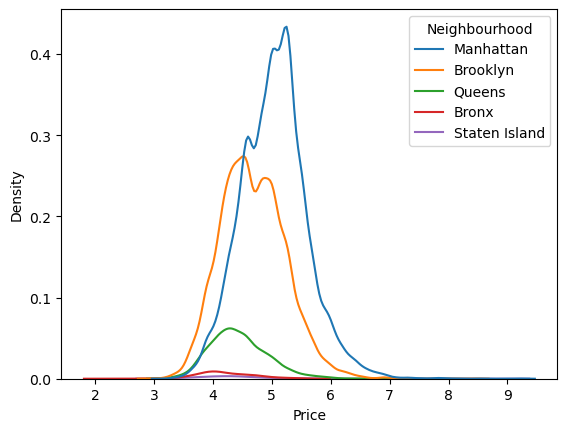

In [39]:
# plot kernel density plot
sns.kdeplot(x=np.log(data['Price']), hue=data['Neighbourhood'])
plt.show()

In [40]:
### Regress Price on Neighborhood without an Intercept
# one-hot encoding of Neighbourhood without an intercept
X = pd.get_dummies(data['Neighbourhood'])
y = data['Price']

# fit linear regression model
model_no_intercept = LinearRegression(fit_intercept=False)
model_no_intercept.fit(X, y)

# get the coefficients
coefficients_no_intercept = model_no_intercept.coef_

# compare coefficients to average prices
coefficient_df = pd.DataFrame({'Neighbourhood': X.columns, 'Coefficient': coefficients_no_intercept})
print(coefficient_df)

   Neighbourhood  Coefficient
0          Bronx    75.276498
1       Brooklyn   127.747378
2      Manhattan   183.664286
3         Queens    96.857233
4  Staten Island   146.166667


In [44]:
### Regress Price on Neighborhood with an Intercept
y = data['Price']
X = pd.get_dummies(data['Neighbourhood'], dtype='int', drop_first = True)

reg = linear_model.LinearRegression().fit(X,y) # Run regression

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print(results)

        variable  coefficient
0       Brooklyn    52.470881
1      Manhattan   108.387789
2         Queens    21.580735
3  Staten Island    70.890169


In [45]:
### Regression of Price on Review Scores Rating and Neighborhood
# split the data
X = data[['Review Scores Rating', 'Neighbourhood']]
X = pd.get_dummies(X, drop_first=True)  # One-hot encode Neighbourhood
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# calculate R^2 and RMSE
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt( np.mean( (y_test - y_pred)**2 ))
review_scores_coefficient = model.coef_[0]

print(f"R^2: {r_squared}")
print(f"RMSE: {rmse}")
print(f"Coefficient on Review Scores Rating: {review_scores_coefficient}")

R^2: 0.045925883817350965
RMSE: 140.91821103729345
Coefficient on Review Scores Rating: 1.2118517840632343


In [47]:
### Regression Including Property Type
# include Property Type
X = data[['Review Scores Rating', 'Neighbourhood', 'Room Type']]
X = pd.get_dummies(X, drop_first=True)  # One-hot encode
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# calculate R^2 and RMSE
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt( np.mean( (y_test - y_pred)**2 ))
review_scores_coefficient = model.coef_[0]

print(f"R^2: {r_squared}")
print(f"RMSE: {rmse}")
print(f"Coefficient on Review Scores Rating: {review_scores_coefficient}")

R^2: 0.18241950125517248
RMSE: 130.44917183057035
Coefficient on Review Scores Rating: 0.7834760306314313


In [ ]:
'''
The coefficient on Review Scores Rating indicates how much the 
price is expected to increase per unit increase in the rating. 
Changes in this coefficient between models can suggest that the
relationship between review scores and price is affected by the
inclusion of additional predictors (like room type).
'''

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?